In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle


#Read data0
X0=open('X','rb')
X=pickle.load(X0)
Y0=open('Y','rb')
Y=pickle.load(Y0)


#X0 et Y0 as backup
X0=X
Y0=Y
Y[Y.nonzero()]=1

In [2]:
ratio=0.6
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=ratio)
print("number of instances:")
print(len(Y_train)+len(Y_test))
print("number of test:")
print(len(Y_test))

number of instances:
2827876
number of test:
1696726



desicion tree:
2
3
4
5
6


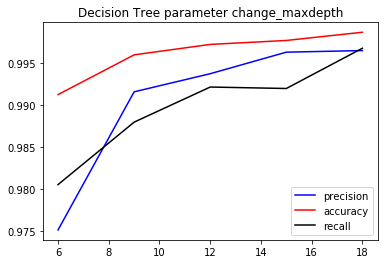

[[1361669    1078]
 [   1171  332808]]


In [3]:

#DESICION TREE

X=np.linspace(2,6,5)
ACCU=[]
PREC=[]
RECALL=[]
print("\ndesicion tree:")
X=X*3
Y_test2=[]
for i in range(2,7):
    print(i)
    tree = DecisionTreeClassifier(max_depth=i*3).fit(X_train, Y_train)
    Y_test2 = tree.predict(X_test)
    #print("precision_score:"+precision_score(Y_test, Y_test2,average='micro'))
    ACCU.append(accuracy_score(Y_test, Y_test2))
    PREC.append(precision_score(Y_test, Y_test2))
    RECALL.append(recall_score(Y_test, Y_test2))
    
    
    
plt.title("Decision Tree parameter change_maxdepth")

plt.plot(X,PREC,color="blue",label="precision")



plt.plot(X,ACCU,color="red",label="accuracy")

plt.plot(X,RECALL,color="black",label="recall")

plt.legend()

plt.show()
#choix du parametre: 100

print(confusion_matrix(Y_test,Y_test2))

In [4]:
print(ACCU[0])
print(PREC[0])
print(RECALL[0])

0.9912531546048094
0.9751469173420545
0.9805412625866313



desicion tree:
2
3
4
5
6


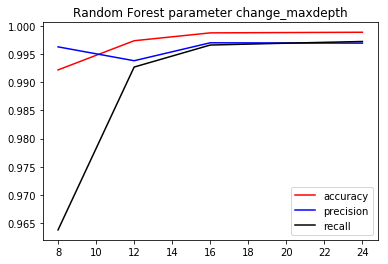

[[1361810     933]
 [   1030  332953]]


In [5]:
#Random Forest
X=np.linspace(2,6,5)
ACCU=[]
PREC=[]
RECALL=[]
print("\ndesicion tree:")
X=X*4
Y_test3=[]
for i in range(2,7):
    print(i)
    tree = RandomForestClassifier(max_depth=i*4).fit(X_train, Y_train)
    Y_test3 = tree.predict(X_test)
    #print("precision_score:"+precision_score(Y_test, Y_test2,average='micro'))
    ACCU.append(accuracy_score(Y_test, Y_test3))
    PREC.append(precision_score(Y_test, Y_test3))
    RECALL.append(recall_score(Y_test, Y_test3))
    
    
    
plt.title("Random Forest parameter change_maxdepth")
plt.plot(X,ACCU,color="red",label="accuracy")
plt.plot(X,PREC,color="blue",label="precision")
plt.plot(X,RECALL,color="black",label="recall")
plt.legend()
plt.show()
#choix du parametre: 100

print(confusion_matrix(Y_test,Y_test3))

2
3
4
5
6


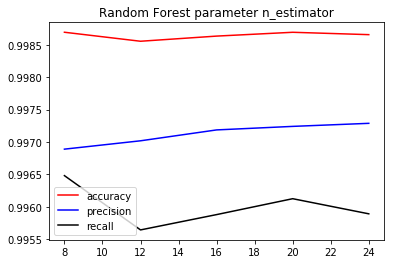

[[1361936    1372]
 [    904  332514]]


In [6]:
#Random Forest
#max_depth=16
X=np.linspace(2,6,5)
ACCU=[]
PREC=[]
RECALL=[]

X=X*4
Y_test3=[]
for i in range(2,7):
    print(i)
    tree = RandomForestClassifier(max_depth=16,n_estimators=i*4).fit(X_train, Y_train)
    Y_test3 = tree.predict(X_test)
    #print("precision_score:"+precision_score(Y_test, Y_test2,average='micro'))
    ACCU.append(accuracy_score(Y_test, Y_test3))
    PREC.append(precision_score(Y_test, Y_test3))
    RECALL.append(recall_score(Y_test, Y_test3))
    
    
    
plt.title("Random Forest parameter n_estimator")
plt.plot(X,ACCU,color="red",label="accuracy")
plt.plot(X,PREC,color="blue",label="precision")
plt.plot(X,RECALL,color="black",label="recall")
plt.legend()
plt.show()
#choix du parametre: 100

print(confusion_matrix(Y_test,Y_test3))

In [9]:
#SVM_Linear
import random
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
Z0=open('datamatrix','rb')
Z=pickle.load(Z0)

Z_index=np.random.choice(len(Z[:,0]),10000)
X1=Z[Z_index,:-1]
Y1=Z[Z_index,-1]
Y1[Y1.nonzero()]=1
ratio=0.3
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=ratio)
print("number of instances:")
print(len(Y1_train)+len(Y1_test))
print("number of test:")
print(len(Y1_test))

number of instances:
10000
number of test:
3000


In [10]:
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score, recall_score
print("\nSupport Vector (linear):")
SVML = LinearSVC().fit(X1_train, Y1_train)

print("result:")
Y1_test1 = SVML.predict(X1_test)
SVMLaccuracy = accuracy_score(Y1_test1, Y1_test)
print("accuracy:")
print(SVMLaccuracy)
print("confusion matrix")
print(confusion_matrix(Y1_test,Y1_test1))


Support Vector (linear):
result:
accuracy:
0.83
confusion matrix
[[2127  306]
 [ 204  363]]


In [11]:
SVM=SVC().fit(X1_train, Y1_train)#par defaut kernel='rbf'
print("\nC-Support Vector:")
print("result:")
Y1_test1 = SVM.predict(X1_test)
SVMaccuracy = accuracy_score(Y1_test1, Y1_test)
print("accuracy:")
print(SVMaccuracy)
print("confusion matrix")
print(confusion_matrix(Y1_test,Y1_test1))


C-Support Vector:
result:
accuracy:
0.831
confusion matrix
[[2432    1]
 [ 506   61]]


In [12]:
#Comparision
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#DecisionTree
tree = DecisionTreeClassifier(max_depth=18).fit(X1_train, Y1_train)
Y1_test2 = tree.predict(X1_test)
print("accuracy_score:")
print(accuracy_score(Y1_test, Y1_test2))
print("confusion_matrix:")
print(confusion_matrix(Y1_test,Y1_test2))

accuracy_score:
0.9923333333333333
confusion_matrix:
[[2415   18]
 [   5  562]]


In [13]:
fotr = RandomForestClassifier(max_depth=16,n_estimators=8).fit(X1_train, Y1_train)
Y1_test2 = fotr.predict(X1_test)
print("accuracy_score:")
print(accuracy_score(Y1_test, Y1_test2))
print("confusion_matrix:")
print(confusion_matrix(Y1_test,Y1_test2))

accuracy_score:
0.9956666666666667
confusion_matrix:
[[2425    8]
 [   5  562]]
